<a href="https://colab.research.google.com/github/KorKanticha/SeniorProject/blob/main/fivefold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import

In [2]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from google.colab import drive
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
drive.mount('/content/gdrive')
xls_Suicide = pd.ExcelFile("/content/gdrive/MyDrive/SeniorProject_KorBoss/Cleaned_Dummy8.xlsx")
df = dict()
df = pd.read_excel(xls_Suicide)


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
#ตัด WTK, attemptToDie,AttemptHurtOthers
feature_cols = ['Gender_หญิง', 'Age', 'Province_Happen_11', 'Province_Happen_12', 'Province_Happen_13', 'Province_Happen_14', 'Province_Happen_15', 'Province_Happen_16', 'Province_Happen_17', 'Province_Happen_18', 'Province_Happen_19', 'Province_Happen_20', 'Province_Happen_21', 'Province_Happen_22', 'Province_Happen_23', 'Province_Happen_24', 'Province_Happen_25', 'Province_Happen_26', 'Province_Happen_27', 'Province_Happen_30', 'Province_Happen_31', 'Province_Happen_32', 'Province_Happen_33', 'Province_Happen_34', 'Province_Happen_35', 'Province_Happen_36', 'Province_Happen_37', 'Province_Happen_38', 'Province_Happen_39', 'Province_Happen_40', 'Province_Happen_41', 'Province_Happen_42', 'Province_Happen_43', 'Province_Happen_44', 'Province_Happen_45', 'Province_Happen_46', 'Province_Happen_47', 'Province_Happen_48', 'Province_Happen_49', 'Province_Happen_50', 'Province_Happen_51', 'Province_Happen_52', 'Province_Happen_53', 'Province_Happen_54', 'Province_Happen_55', 'Province_Happen_56', 'Province_Happen_57', 'Province_Happen_58', 'Province_Happen_60', 'Province_Happen_61', 'Province_Happen_62', 'Province_Happen_63', 'Province_Happen_64', 'Province_Happen_65', 'Province_Happen_66', 'Province_Happen_67', 'Province_Happen_70', 'Province_Happen_71', 'Province_Happen_72', 'Province_Happen_73', 'Province_Happen_74', 'Province_Happen_75', 'Province_Happen_76', 'Province_Happen_77', 'Province_Happen_80', 'Province_Happen_81', 'Province_Happen_82', 'Province_Happen_83', 'Province_Happen_84', 'Province_Happen_85', 'Province_Happen_86', 'Province_Happen_90', 'Province_Happen_91', 'Province_Happen_92', 'Province_Happen_93', 'Province_Happen_94', 'Province_Happen_95', 'Province_Happen_96', 'Province_Happen_ต่างประเทศ', 'Status_คู่', 'Status_สมณะ', 'Status_หม้าย', 'Status_หย่า', 'Status_แยก', 'Status_โสด', 'Religion_คริสต์', 'Religion_ซิกข์', 'Religion_บาไฮ', 'Religion_พุทธ', 'Religion_อิสลาม', 'Religion_ไม่นับถือศาสนา', 'Disease_M_Physcopath_1', 'Disease_M_Depression_1', 'Disease_M_Others_1', 'Disease_P_Diabetes_1', 'Disease_P_HBP_1', 'Disease_P_Cardio_1', 'Disease_P_Kidney_1', 'Disease_P_Liver_1', 'Disease_P_lung_1', 'Disease_P_Migrant_1', 'Disease_P_Joint_1', 'Disease_P_Paralyze_1', 'Disease_P_Cancer_1', 'Disease_P_HIV_1', 'Disease_P_Others_1', 'Time_Group_1', 'Time_Group_2', 'Time_Group_3', 'Time_Group_4', 'Time_Group_5', 'Time_Group_6', 'Month_Group_1', 'Month_Group_2', 'Month_Group_3', 'Month_Group_4', 'Attempt_Year', 'Attempt_Ever_0', 'Attempt_Ever_1', 'Attempt_Sign_0', 'Attempt_Sign_1', 'Factor_R_Neglected_1', 'Factor_R_Humuliated_1', 'Factor_R_Jeolous_1', 'Factor_R_Qurrel_1', 'Factor_R_Needy_1', 'Factor_R_Lost_1', 'Factor_R_Aging_Lonesome_1', 'Factor_R_Working_Environment_1', 'Factor_Alcoholic_0', 'Factor_Alcoholic_1', 'Factor_A_At_Sucide_Attempt_1', 'Factor_Drugs_0', 'Factor_Drugs_1', 'Factor_D_At_Sucide_Attempt_1', 'Factor_Di_Lonesone_0', 'Factor_Di_Lonesone_1', 'Factor_Di_Pain_0', 'Factor_Di_Pain_1', 'Factor_Economic_0', 'Factor_Economic_1', 'Factor_E_Poor_0', 'Factor_E_Poor_1', 'Factor_E_Unemployed_0', 'Factor_E_Unemployed_1', 'Factor_E_Dept_0', 'Factor_E_Dept_1', 'Factor_Others_1', 'Disease_P_Direct_COVID_1', 'Disease_P_COVID_1', 'Factor_C_Unemployed_0', 'Factor_C_Unemployed_1', 'Factor_C_Poor_0', 'Factor_C_Poor_1', 'Factor_C_Dept_0', 'Factor_C_Dept_1', 'Factor_C_Mental_0', 'Factor_C_Mental_1', 'Factor_C_Others_0', 'Factor_C_Others_1']
#feature_cols = ['Gender_หญิง', 'Age', 'Province_Happen_11', 'Province_Happen_12', 'Province_Happen_13', 'Province_Happen_14', 'Province_Happen_15', 'Province_Happen_16', 'Province_Happen_17', 'Province_Happen_18', 'Province_Happen_19', 'Province_Happen_20', 'Province_Happen_21', 'Province_Happen_22', 'Province_Happen_23', 'Province_Happen_24', 'Province_Happen_25', 'Province_Happen_26', 'Province_Happen_27', 'Province_Happen_30', 'Province_Happen_31', 'Province_Happen_32', 'Province_Happen_33', 'Province_Happen_34', 'Province_Happen_35', 'Province_Happen_36', 'Province_Happen_37', 'Province_Happen_38', 'Province_Happen_39', 'Province_Happen_40', 'Province_Happen_41', 'Province_Happen_42', 'Province_Happen_43', 'Province_Happen_44', 'Province_Happen_45', 'Province_Happen_46', 'Province_Happen_47', 'Province_Happen_48', 'Province_Happen_49', 'Province_Happen_50', 'Province_Happen_51', 'Province_Happen_52', 'Province_Happen_53', 'Province_Happen_54', 'Province_Happen_55', 'Province_Happen_56', 'Province_Happen_57', 'Province_Happen_58', 'Province_Happen_60', 'Province_Happen_61', 'Province_Happen_62', 'Province_Happen_63', 'Province_Happen_64', 'Province_Happen_65', 'Province_Happen_66', 'Province_Happen_67', 'Province_Happen_70', 'Province_Happen_71', 'Province_Happen_72', 'Province_Happen_73', 'Province_Happen_74', 'Province_Happen_75', 'Province_Happen_76', 'Province_Happen_77', 'Province_Happen_80', 'Province_Happen_81', 'Province_Happen_82', 'Province_Happen_83', 'Province_Happen_84', 'Province_Happen_85', 'Province_Happen_86', 'Province_Happen_90', 'Province_Happen_91', 'Province_Happen_92', 'Province_Happen_93', 'Province_Happen_94', 'Province_Happen_95', 'Province_Happen_96', 'Province_Happen_ต่างประเทศ', 'Status_คู่', 'Status_สมณะ', 'Status_หม้าย', 'Status_หย่า', 'Status_แยก', 'Status_โสด', 'Religion_คริสต์', 'Religion_ซิกข์', 'Religion_บาไฮ', 'Religion_พุทธ', 'Religion_อิสลาม', 'Religion_ไม่นับถือศาสนา', 'WTK_Overdose_1', 'WTK_Insecticide_1', 'WTK_Herbicide_1', 'WTK_Other_Chemicals_1', 'WTK_Sharp_Weapons_1', 'WTK_Guns_1', 'WTK_Jump_Off_Building_1', 'WTK_Hang_1', 'WTK_Jump_Into_Water_1', 'WTK_Ran_Into_Cars_1', 'WTK_Smoke_Gas_1', 'Disease_M_Physcopath_1', 'Disease_M_Depression_1', 'Disease_M_Others_1', 'Disease_P_Diabetes_1', 'Disease_P_HBP_1', 'Disease_P_Cardio_1', 'Disease_P_Kidney_1', 'Disease_P_Liver_1', 'Disease_P_lung_1', 'Disease_P_Migrant_1', 'Disease_P_Joint_1', 'Disease_P_Paralyze_1', 'Disease_P_Cancer_1', 'Disease_P_HIV_1', 'Disease_P_Others_1', 'Time_Group_1', 'Time_Group_2', 'Time_Group_3', 'Time_Group_4', 'Time_Group_5', 'Time_Group_6', 'Month_Group_1', 'Month_Group_2', 'Month_Group_3', 'Month_Group_4', 'Attempt_Year', 'Attempt_Hurt_Others_0', 'Attempt_Hurt_Others_1', 'Attempt_Ever_0', 'Attempt_Ever_1', 'Attempt_To_Die_0', 'Attempt_To_Die_1', 'Attempt_Sign_0', 'Attempt_Sign_1', 'Factor_R_Neglected_1', 'Factor_R_Humuliated_1', 'Factor_R_Jeolous_1', 'Factor_R_Qurrel_1', 'Factor_R_Needy_1', 'Factor_R_Lost_1', 'Factor_R_Aging_Lonesome_1', 'Factor_R_Working_Environment_1', 'Factor_Alcoholic_0', 'Factor_Alcoholic_1', 'Factor_A_At_Sucide_Attempt_1', 'Factor_Drugs_0', 'Factor_Drugs_1', 'Factor_D_At_Sucide_Attempt_1', 'Factor_Di_Lonesone_0', 'Factor_Di_Lonesone_1', 'Factor_Di_Pain_0', 'Factor_Di_Pain_1', 'Factor_Economic_0', 'Factor_Economic_1', 'Factor_E_Poor_0', 'Factor_E_Poor_1', 'Factor_E_Unemployed_0', 'Factor_E_Unemployed_1', 'Factor_E_Dept_0', 'Factor_E_Dept_1', 'Factor_Others_1', 'Disease_P_Direct_COVID_1', 'Disease_P_COVID_1', 'Factor_C_Unemployed_0', 'Factor_C_Unemployed_1', 'Factor_C_Poor_0', 'Factor_C_Poor_1', 'Factor_C_Dept_0', 'Factor_C_Dept_1', 'Factor_C_Mental_0', 'Factor_C_Mental_1', 'Factor_C_Others_0', 'Factor_C_Others_1']
X = df[feature_cols] # Features
y = df.Success # Target variable

X_trainandval, X_test, y_trainandval, y_test = train_test_split(X, y,
    test_size=0.2 , random_state = 1)
X_train, X_val, y_train, y_val = train_test_split(X_trainandval, y_trainandval,
    test_size=0.25 , random_state = 1)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")




#SVM

## Base


In [ ]:
# import SVC classifier
from sklearn.svm import SVC
# import metrics to compute accuracy
from sklearn.metrics import accuracy_score
svc=SVC() 
svc.fit(scaler.transform(X_train),y_train)
y_pred = svc.predict(scaler.transform(X_test))
print(svc.score(scaler.transform(X_test),y_test))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
############################################
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Negatives(TN) = ', cm[0,0])
print('\nTrue Positives(TP) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])
import seaborn as sns
cm_matrix = pd.DataFrame(data=cm, columns=['Predict Positive:1', 'Predict Negative:0'], 
                                 index=['Actual Positive:1', 'Actual Negative:0'])
sns_heatmap_svm_base = sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

## Linear Kernel

In [ ]:
# import SVC classifier
from sklearn.svm import SVC
# import metrics to compute accuracy
from sklearn.metrics import accuracy_score
svc_linear=SVC(kernel='linear') 
svc_linear.fit(scaler.transform(X_train),y_train)
y_pred = svc_linear.predict(scaler.transform(X_test))
print(svc_linear.score(scaler.transform(X_test),y_test))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
############################################
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Negatives(TN) = ', cm[0,0])
print('\nTrue Positives(TP) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])
import seaborn as sns
cm_matrix = pd.DataFrame(data=cm, columns=['Predict Positive:0', 'Predict Negative:1'], 
                                 index=['Actual Positive:0', 'Actual Negative:1'])
sns_heatmap_svm_base = sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
print(classification_report(y_test,y_pred))

#Decision Tree


TRAIN: [    0     1     2 ... 39788 39789 39790] VALID [    3     8    11 ... 39774 39776 39781]
Confusion matrix

 [[5221  356]
 [ 797 1585]]

True Negatives(TN) =  5221

True Positives(TP) =  1585

False Positives(FP) =  356

False Negatives(FN) =  797
              precision    recall  f1-score   support

         0.0       0.87      0.94      0.90      5577
         1.0       0.82      0.67      0.73      2382

    accuracy                           0.86      7959
   macro avg       0.84      0.80      0.82      7959
weighted avg       0.85      0.86      0.85      7959

Test Result:
Accuracy Score: 85.51%
_______________________________________________
CLASSIFICATION REPORT:
                   0.0          1.0  accuracy    macro avg  weighted avg
precision     0.867564     0.816589  0.855133     0.842077      0.852308
recall        0.936166     0.665407  0.855133     0.800787      0.855133
f1-score      0.900561     0.733287  0.855133     0.816924      0.850498
support    5577.000

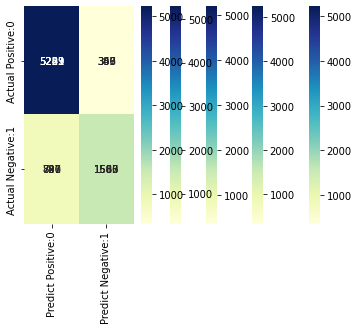

In [41]:
from sklearn.model_selection import KFold
import seaborn as sns

# ใช้ Kfold ต้องแปลงเป็น numpy
X = df[feature_cols].values # Features
y = df['Success'].values # Target variable

# Split dataset into training set and test set
# แบ่งเป็นคแ่ trainandval & test
X_trainandval, X_test, y_trainandval, y_test = train_test_split(X, y,
    test_size=0.2 , random_state = 1)

#แบ่ง trainandval เป็น train, valid 5แบบ แล้วรันโมเดล
kf = KFold(n_splits=5, shuffle = True, random_state=1)
kf.get_n_splits(X_trainandval)

for train_index, valid_index in kf.split(X_trainandval):
  print("TRAIN:", train_index, "VALID", valid_index)
  X_train, X_val = X_trainandval[train_index], X_trainandval[valid_index]
  y_train, y_val = y_trainandval[train_index], y_trainandval[valid_index]

# Create Decision Tree classifer object
  clf = DecisionTreeClassifier(criterion='entropy', max_depth=6)

# Train Decision Tree Classifer
  clf = clf.fit(X_train,y_train)

  y_predval = clf.predict(X_val)

  cm = confusion_matrix(y_val, y_predval)
  print('Confusion matrix\n\n', cm)
  print('\nTrue Negatives(TN) = ', cm[0,0])
  print('\nTrue Positives(TP) = ', cm[1,1])
  print('\nFalse Positives(FP) = ', cm[0,1])
  print('\nFalse Negatives(FN) = ', cm[1,0])

  cm_matrix = pd.DataFrame(data=cm, columns=['Predict Positive:0', 'Predict Negative:1'], 
                                 index=['Actual Positive:0', 'Actual Negative:1'])
  sns_heatmap_svm_base = sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
  print(classification_report(y_val,y_predval))
  print_score(clf, X_train, y_train, X_val, y_val, train=False)
  #print_score(clf, X_train, y_train, X_val, y_val, train=True)


In [34]:
type(y)

numpy.ndarray